使用的是scikit-learn库中的neighbors.KNeighborsClassifier，K最近邻分类功能

In [1]:
from sklearn import neighbors

In [2]:
knn=neighbors.KNeighborsClassifier(n_neighbors=5,weights='uniform',algorithm='auto',leaf_size=30,p=2,metric='minkowski',metric_params=None,n_jobs=-1)

n_neighbors就是kNN里的k，就是在分类时，我们选取问题点最近临点个数<br>
weights实在进行分类时给近邻上的加权，默认的uniform是等权重加权<br>
algorithm是分类时采用的算法，有‘brute’，‘kd_tree’，和‘ball_tree’<br>
leaf_size是kd_tree或ball_tree上生成树的树叶(树叶就是二叉树中没有分支的节点)的大小。<br>
metric和p，是距离函数,如果metric=‘minkowski’，计算公式如下：$d((x_1,...x_n),((y_1,...y_n)))=(\sum _{i=1}^n|x_i-y_i|^p)^\frac{1}{p}$,当p=2时，就是欧氏距离<br>
n_jobs是并行计算的线程数量，默认是1，-1则设为CPU的内核数<br>
在创建了一个分类器后，我们需要给他数据来进行学习。这时需要把训练数据传递给fit()来进行拟合功能

In [3]:
knn.fit(X,y)

NameError: name 'X' is not defined

X是一个list或array的数据，每一组数据可以是tuple也可以是list或者一维array，但是要注意所有数据的长度必须一样(等同于特征的数量)。当然，也可以把X理解为一个矩阵，其中每一行表示一个样本的特征数据。
y是一个和X等同长度的list或array，其中每个元素是X对应数据的分类标签

In [ ]:
knn.predict(X)

最常用的预测功能。输入X待预测的的list或array的坐标，则输出y是一个长度相同的array，y[i]是通过kNN分类对x[i]所预测的分类标签。

In [4]:
import random
from sklearn import neighbors
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_gaussian_quantiles as gaussian

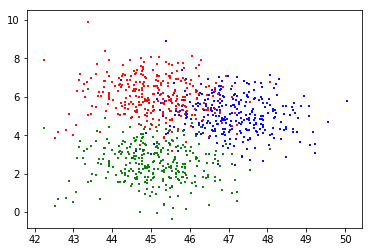

In [22]:
X1,y1=gaussian(cov=1,n_samples=300,mean=(47,5),n_features=2,random_state=1)#使用内置的高斯分布默认各个维度上方差为1，不能更改
X2,y2=gaussian(cov=1,n_samples=300,mean=(45,6),n_features=2,random_state=1)
X3,y3=gaussian(cov=1,n_samples=300,mean=(45,2.5),n_features=2,random_state=1)
plt.scatter(X1[:,0],X1[:,1],c='b',marker='s',s=1,alpha=1)
plt.scatter(X2[:,0],X2[:,1],c='r',marker='s',s=1,alpha=1)
plt.scatter(X3[:,0],X3[:,1],c='g',marker='s',s=1,alpha=1)
X=np.concatenate((X1,X2,X3),axis=0)#通过合并三个子集构成一个完整的数据集,axis=0??


In [23]:
x_diff=max(X[:,0])-min(X[:,0])
y_diff=max(X[:,1])-min(X[:,1])
X_normalized=np.asarray([x/x_diff for x in X[:,0]])
Y_normalized=np.asarray([x/y_diff for x in X[:,1]])
X_normalized=X_normalized.reshape((-1,1))
Y_normalized=Y_normalized.reshape((-1,1))
print(X_normalized.shape,Y_normalized.shape)


(900, 1) (900, 1)


(900, 2)


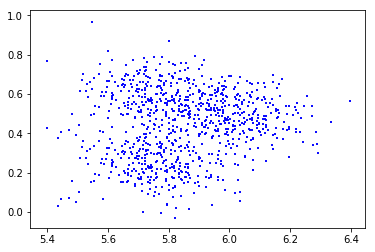

In [26]:
X=np.concatenate((X_normalized,Y_normalized),axis=1)
plt.scatter(X[:,0],X[:,1],c='b',marker='s',s=1,alpha=1)
print(X.shape)

In [29]:
labels=[1]*300+[2]*300+[3]*300#list的*操作应该被重载过，[]*n相当于复制n个
labels=np.asarray(labels)
knn=neighbors.KNeighborsClassifier(n_neighbors=5,weights='uniform',algorithm='auto',leaf_size=30,p=2,metric='minkowski',metric_params=None,n_jobs=-1)
knn.fit(X,labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform')

In [53]:
testdata,_=gaussian(cov=1,n_samples=200,mean=(5.4,0.2),n_features=2,random_state=1)


In [56]:
knn.predict(testdata)#预测点属于
a,b,c=(0,0,0)
for x in knn.predict(testdata):#统计一下所属分类的情况
    if x==1:
        a=a+1
    if x==2:
        b=b+1
    if x==3:
        c=c+1
print('a',a,'b',b,'c',c)

a 34 b 66 c 100


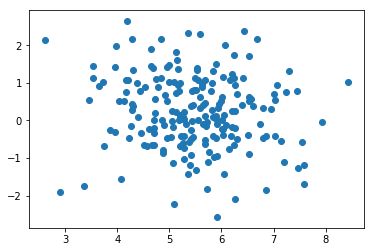

In [57]:
plt.scatter(testdata[:,0],testdata[:,1])#看一下测试数据的分布情况，嘻嘻

In [33]:
knn.predict_proba([(5.9,0.5)])#测试点属于分类的概率

array([[0.4, 0.6, 0. ]])

# 手撸kd树实现knn


In [76]:
class kdtree(object):
    def __init__(self, point_list, depth=0, root=None):
        if len(point_list)>0:
            k = len(point_list[0][0])
            axis = depth%k
            point_list.sort(key=lambda x:x[0][axis])
            median = len(point_list)//2
            self.axis = axis
            self.root = root
            self.size = len(point_list)
            #造节点
            self.node = point_list[median]
            if len(point_list[:median])>0:
                self.right = kdtree(point_list[:median], depth+1, self)
            else:
                self.left = None
            if len(point_list[median+1:])>0:
                self.right = kdtree(point_list[median+1:], depth+1, self)
            else:
                self.right = None
        else:
            return None
    def insert(self,point):
        self.size += 1
        if point[0][self.axis]<self.node[0][self.axis]:
            if self.left!=None:
                self.left.insert(point)
            else:
                self.left = kdtree([point], self.axis+1, self)
        else:
            if self.right!=None:
                self.right.insert(point)
            else:
                self.right = kdtree([point], self.axis+1,self)
    def find_leaf(self, point):
        if self.left==None and self.right==None:
            return self
        elif self.left==None:
            return self.right.find_leaf(point)
        elif self.right==None:
            return self.left.find_leaf(point)
        elif point[self.axis]<self.node[0][self.axis]:
            return self.left.find_leaf(point)
        else:
            return self.right.find_leaf(point)
    def knearest(self, point, k=1, dist=lambda x,y: sum(map(lambda u,v:(u-v)**2,x,y))):
        leaf = self.find_leaf(point)
        return leaf.k_down_up(point, k, dist, result=[], stop=self, visited=None)
    def k_down_up(self, point, k, dist, result=[], stop=None, visited=None):
        if result==[]:
            max_dist = 0
        else:
            max_dist = max([x[1] for x in result])
            other_result = []
        if (self.left==visited and self.node[0][self.axis]-point[self.axis]<max_dist and self.right!=None)\
            or (len(result)<k and self.left==visited and self.right!=None):
            other_result = self.right.knearest(point, k, dist)
        if (self.right==visited and point[self.axis]-self.node[0][self.axis]<max_dist and self.left!=None)\
            or (len(result)<k and self.right==visited and self.left!=None):
            other_result = self.left.knearest(point, k, dist)
        
        result.append((self.node, dist(point, self.node[0])))
        result = sorted(result+other_result, key=lambda pair:pair[1])[:k]
        if self == stop:
            return result
        else:
            return self.root.k_down_up(point, k, dist, result, stop, self)
    def kNN(self, point, k, dist=lambda x,y:sum(map(lambda u,v:(u-v)**2,x,y))):
        nearests = self.knearest(point, k, dist)
        statistics = {}
        for data in nearests:
            label = data[0][1]
            if label not in statistics:
                statistics[label] = 1
            else:
                statistics[label] +=1
            max_label = max(statistics.iteritems(), key=operator.itemgetter(1))[0]
            return max_label, float(statistics[max_label])/float(len(nearests))    